## graph - state - edges - nodes - invoke - stategraph

In [60]:
def function1(input1):
    return input1+ " from first function"

In [61]:
def function2(input2):
    return input2+ "  from second function"

In [62]:
def function3(input3):
    pass

In [63]:
function1("Hello")

'Hello from first function'

In [64]:
function2("World")

'World  from second function'

In [65]:
from langgraph.graph import Graph

In [66]:
workflow1=Graph()

In [67]:
workflow1.add_node("fun1",function1)

In [68]:
workflow1.add_node("fun2",function2)

In [69]:
workflow1.add_edge("fun1","fun2")

In [70]:
workflow1.set_entry_point("fun1")

In [71]:
workflow1.set_finish_point("fun2")

In [72]:
app=workflow1.compile()

In [73]:
app.get_graph()

Graph(nodes={'fun1': Node(id='fun1', name='fun1', data=fun1(tags=None, recurse=True, explode_args=False, func_accepts_config=False, func_accepts={}), metadata=None), 'fun2': Node(id='fun2', name='fun2', data=fun2(tags=None, recurse=True, explode_args=False, func_accepts_config=False, func_accepts={}), metadata=None), '__start__': Node(id='__start__', name='__start__', data=None, metadata=None), '__end__': Node(id='__end__', name='__end__', data=None, metadata=None)}, edges=[Edge(source='__start__', target='fun1', data=None, conditional=False), Edge(source='fun1', target='fun2', data=None, conditional=False), Edge(source='fun2', target='__end__', data=None, conditional=False)])

In [74]:
from IPython.display import Image, display

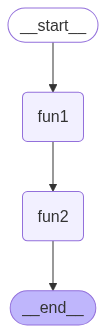

In [75]:
display(Image(app.get_graph().draw_mermaid_png()))

In [76]:
app.invoke("Agentic AI ")


'Agentic AI  from first function  from second function'

In [77]:
#Visualize the o/p of workflow node wise
for output in app.stream("hi this is rohit"):
    for key,value in output.items():
        print(f"here is output from {key}")
        print("_______")
        print(value)
        print("\n")

here is output from fun1
_______
hi this is rohit from first function


here is output from fun2
_______
hi this is rohit from first function  from second function




In [86]:
import os
from dotenv import load_dotenv
load_dotenv()


True

In [87]:
os.environ["GROQ_API_KEY"] = os.getenv("GROQ_API_KEY")

In [88]:
from langchain_groq import ChatGroq
model = ChatGroq(model="allam-2-7b")

In [89]:
model.invoke("What is the capital of India?")

AuthenticationError: Error code: 401 - {'error': {'message': 'Invalid API Key', 'type': 'invalid_request_error', 'code': 'invalid_api_key'}}